In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

# DATA LOADING

In [2]:
train = pd.read_csv('train_newbigmartsales.csv')
test = pd.read_csv('test_newbigmartsales.csv')
print("train_shape:", train.shape)
print("test_shape:", test.shape)

train_shape: (8523, 12)
test_shape: (5681, 11)


In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
train.corr()
#for checking correlation of each of the numerical variables to the target value

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [10]:
train.describe()

#this method is used to calculate some statistical data like percentile, mean, and std of the numerical values of the dataframe.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# DATA VISUALIZATION

# Outlet Type

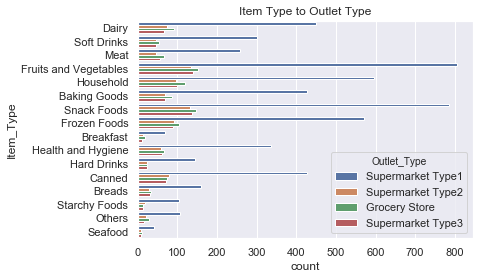

In [11]:
sns.set(style="darkgrid")
sns.countplot(y="Item_Type", hue="Outlet_Type", data=train)
plt.title("Item Type to Outlet Type")
plt.show()

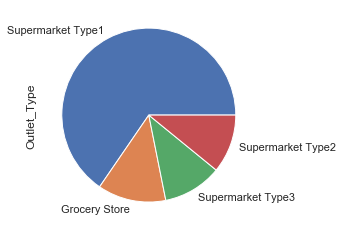

In [12]:
train.Outlet_Type.value_counts().plot(kind='pie')
plt.show()

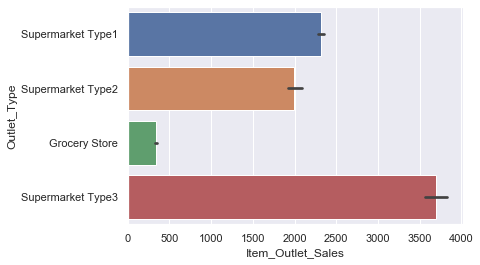

<Figure size 2880x1080 with 0 Axes>

In [13]:
sns.barplot(y=train["Outlet_Type"],x=train["Item_Outlet_Sales"])
plt.figure(figsize=(40,15))
plt.show()

# Outlet Location Type

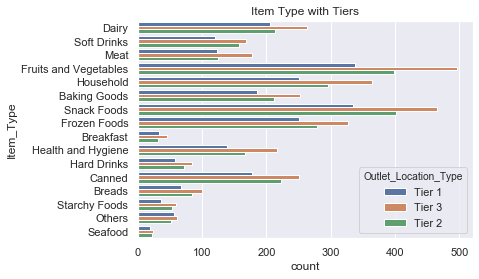

In [14]:
sns.set(style="darkgrid")
sns.countplot(y="Item_Type",hue="Outlet_Location_Type",data=train)
plt.title("Item Type with Tiers")
plt.show()

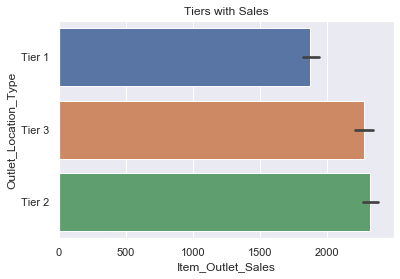

In [15]:
sns.barplot(y=train["Outlet_Location_Type"],x=train["Item_Outlet_Sales"])
plt.title("Tiers with Sales")
plt.show()

# Item Fat Content

In [16]:
PW= train.groupby("Item_Fat_Content").sum().reset_index()
PW
#the reset_index() function is used to generate a new DataFrame or Series with the index reset
#Low fat products are seen to have the best product weight and the best sales

,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,LF,3328.835,21.054330,43857.1062,631348,6.552424e+05
1,Low Fat,54687.900,326.541080,717390.8394,10167044,1.101503e+07
2,Regular,30341.545,200.970026,409413.1214,5771667,6.457454e+06
3,low fat,1055.375,7.313655,15071.7328,223539,2.338270e+05
4,reg,1361.320,7.764190,15948.6810,233923,2.295765e+05


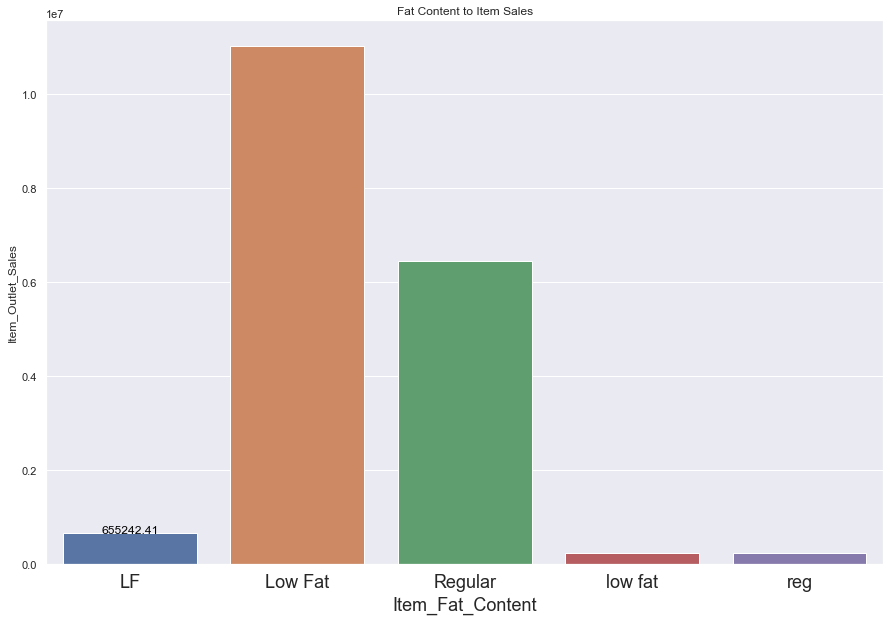

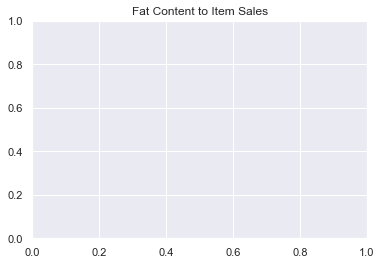

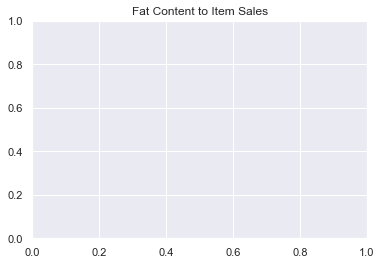

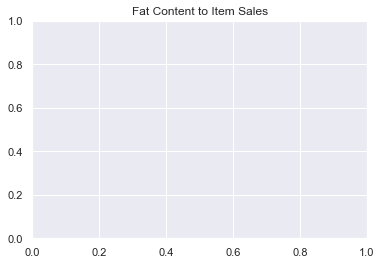

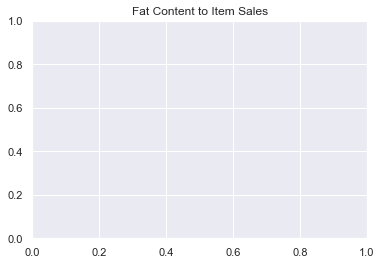

In [17]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
g= sns.barplot(PW["Item_Fat_Content"], PW["Item_Outlet_Sales"])
for index, row in PW.iterrows():
    g.text(row.name, row.Item_Outlet_Sales, round(row.Item_Outlet_Sales,2), color="black", ha="center")
    g.set_xticklabels(g.get_xticklabels(), fontsize=18)
    g.set_xlabel("Item_Fat_Content", fontsize=18)
    plt.title("Fat Content to Item Sales")
    plt.show()
    
#Items with Low fat seems to make the best sales

# Outlet Size

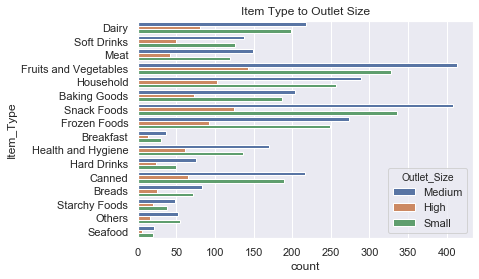

In [18]:
sns.set(style="darkgrid")
sns.countplot(y="Item_Type", hue="Outlet_Size", data=train)
plt.title("Item Type to Outlet Size")
plt.show()
#Medium sized outlets has most products

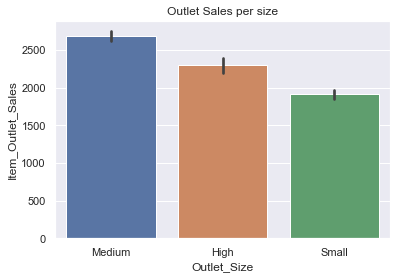

In [19]:
sns.barplot(train["Outlet_Size"], train["Item_Outlet_Sales"])
plt.title("Outlet Sales per size")
plt.show()
#This still ascertain medium sized supermarket as the best sales making market

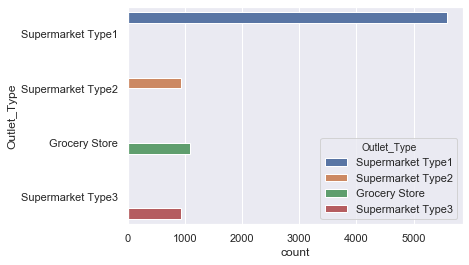

In [20]:
sns.set(style="darkgrid")
sns.countplot(y="Outlet_Type", hue="Outlet_Type", data=train)
plt.show()

# Item Type

In [21]:
PV= train.groupby("Item_Type").sum().reset_index()
PV

,Item_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Baking Goods,6580.530,44.821706,81894.7364,1294528,1.265525e+06
1,Breads,2314.775,16.630030,35379.1198,501412,5.532372e+05
2,Breakfast,1136.370,9.429531,15596.6966,219707,2.322990e+05
3,Canned,6632.775,44.215926,90706.7270,1296801,1.444151e+06
4,Dairy,7599.155,49.395349,101276.4596,1362419,1.522594e+06
5,Frozen Foods,9238.550,56.192325,118558.8814,1710309,1.825735e+06
6,Fruits and Vegetables,13476.040,84.407946,178124.0810,2461191,2.820060e+06
7,Hard Drinks,2086.260,13.897707,29334.6766,427610,4.577934e+05
8,Health and Hygiene,5651.195,28.712309,68025.8388,1038822,1.045200e+06
9,Household,10159.015,55.803305,135976.5254,1817984,2.055494e+06


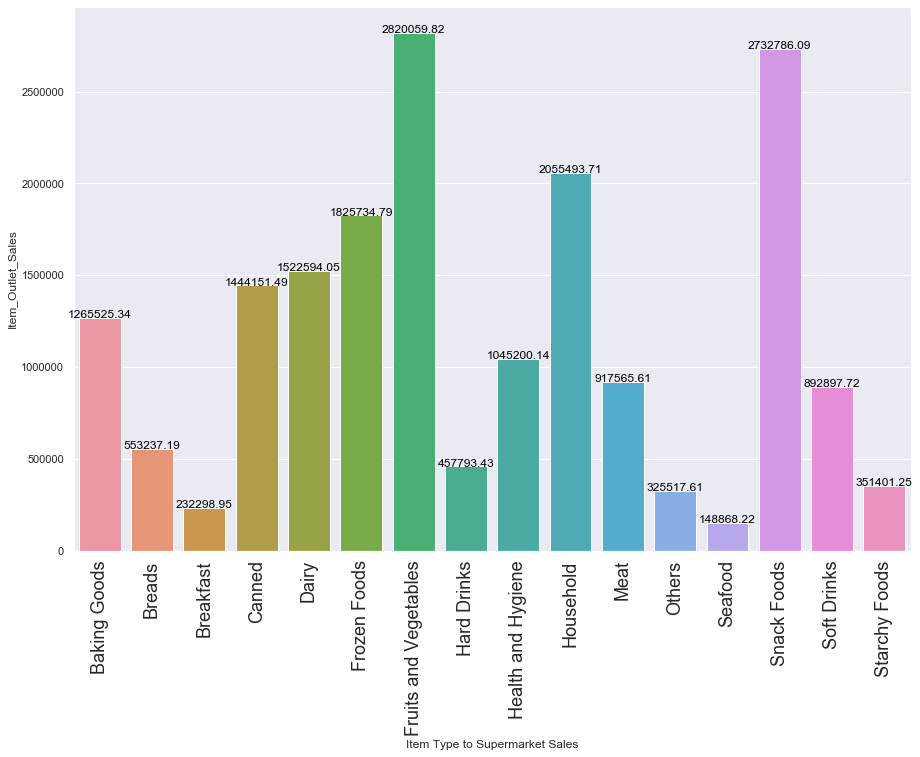

In [22]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
g= sns.barplot(PV["Item_Type"],PV["Item_Outlet_Sales"])
for index, row in PV.iterrows():
    g.text(row.name, row.Item_Outlet_Sales, round(row.Item_Outlet_Sales,2), color='black', ha='center')
    g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=18)
    g.set_xlabel("Item Type to Supermarket Sales")
plt.show()
#We clearly see Fruits and vegetables, followed by Snack Foods, Household, Frozen Foods to Diary as the Best Five Sales Making Products

# Based on our visualization, we deduced that;

# Supermarket Type 3, Outlet Location Tier 2, and a medium sized outlets are the best for making good sales

# Low Fat Content Items, Item Types like Snack Foods, Fruits and Vegetables are the best Sales Making Items

# DATA PREPROCESSING

In [23]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
train.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

# Dealing with Missing Values

In [25]:
Lf= train["Item_Fat_Content"]=="Low Fat"
RG= train["Item_Fat_Content"]=="Regular"
LF= train["Item_Fat_Content"]=="LF"
lf= train["Item_Fat_Content"]=="low fat"
rg= train["Item_Fat_Content"]=="reg"

In [26]:
LOW= LF + Lf + lf
REG= RG + rg
#We fill in the Item_Weight missing values with respect to the Item_Fat_Content values. The LF, Low Fat, low fat appears to be the same, so we added them together and set it to the name LOW. Similarly, the Regular and reg set to the name REG. 

In [27]:
train.loc[LOW, "Item_Weight"]= train.loc[LOW, "Item_Weight"].fillna(train.loc[LOW, "Item_Weight"].mean())
train.loc[REG, "Item_Weight"]= train.loc[REG, "Item_Weight"].fillna(train.loc[REG, "Item_Weight"].mean())
train.isnull().sum()

#The fillna() function is used to fill NA/NaN values using the specified method
#We then got it filled with the mean value

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
L = test["Item_Fat_Content"]== "Low Fat"
R = test["Item_Fat_Content"]== "Regular"
LFr = test["Item_Fat_Content"]== "LF"
l = test["Item_Fat_Content"]== "low fat"
r = test["Item_Fat_Content"]== "reg"

In [29]:
low = L + LFr + l
reg = R + r

In [30]:
test.loc[low, "Item_Weight"]= test.loc[low, "Item_Weight"].fillna(test.loc[low, "Item_Weight"].mean())
test.loc[reg, "Item_Weight"]= test.loc[reg, "Item_Weight"].fillna(test.loc[reg, "Item_Weight"].mean())
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [31]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
train["Outlet_Size"] = train["Outlet_Size"].fillna("Medium", axis=0)

In [33]:
test["Outlet_Size"] = test["Outlet_Size"].fillna("Medium", axis=0)
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [34]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [35]:
train["Item_Outlet_Identifier"]= train["Item_Identifier"] + train["Outlet_Identifier"]
test["Item_Outlet_Identifier"]= test["Item_Identifier"] + test["Outlet_Identifier"]

#The Item_Identifier and the Outket_Identifier seem to be redundant. However, we did a little feature engineering on the variables by summing up the two variables and setting them to one variable named Item_Outlet_Identifier

# Dealing With Categorical Variables

In [39]:
col = ("Item_Outlet_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type")
for x in col:
    le = LabelEncoder()
    train[x] = le.fit_transform(train[x].values)
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Item_Outlet_Identifier         int64
dtype: object

In [40]:
cols = ("Item_Outlet_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type")
for y in cols:
    le = LabelEncoder()
    test[y] = le.fit_transform(test[y].values)
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Identifier         int64
dtype: object

In [41]:
train_new = train.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)
test_new = test.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)

# MAKING A SUBMISSION

In [42]:
submission= pd.read_csv("sample_submission.csv")
submission

FileNotFoundError: [Errno 2] File sample submission.csv does not exist: 'sample submission.csv'